In [5]:
import numpy as np 
import pandas as pd
import os
import pickle

In [6]:
TARGET_FOLDER = 'logs/vehs_10'

# load states and actions
with open(f'{TARGET_FOLDER}/states.pkl', 'rb') as f:
    states = pickle.load(f)
with open(f'{TARGET_FOLDER}/actions.pkl', 'rb') as f:
    actions = pickle.load(f)


In [7]:
# get the percentage of policy action that are 1
non_greedy_actions = np.sum(actions)
print(f'Percentage of non-greedy actions: {non_greedy_actions/len(actions)}')
print(f'Percentage of greedy actions: {1 - non_greedy_actions/len(actions)}')

Percentage of non-greedy actions: 0.0
Percentage of greedy actions: 1.0


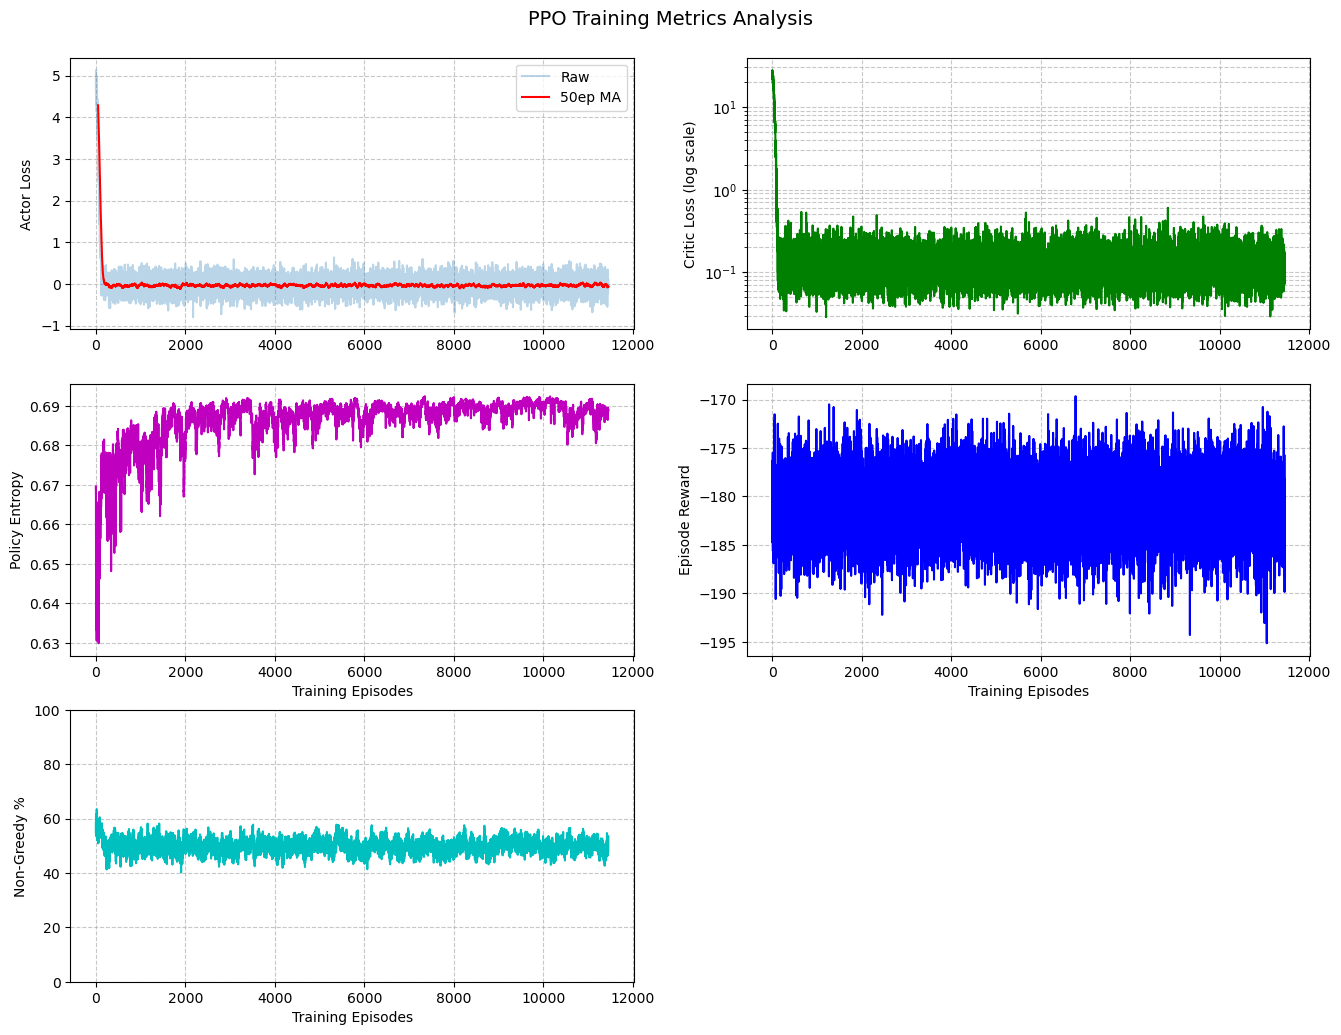

In [ ]:
# Draw Loss Curve
